# **Personalized Medicine: Redefining Cancer Treatment**

**Importing the libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score

**Importing the dataset**

https://www.kaggle.com/c/msk-redefining-cancer-treatment/data

In [2]:
training_text = pd.read_csv('/content/data/training_text', 
                      sep='\|\|',
                      header=None, 
                      skiprows=1,
                      names=["ID","Text"]).set_index('ID')

training_text

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """


,Text
ID,
0,Cyclin-dependent kinases (CDKs) regulate a var...
1,Abstract Background Non-small cell lung canc...
2,Abstract Background Non-small cell lung canc...
3,Recent evidence has demonstrated that acquired...
4,Oncogenic mutations in the monomeric Casitas B...
...,...
3316,Introduction Myelodysplastic syndromes (MDS) ...
3317,Introduction Myelodysplastic syndromes (MDS) ...
3318,The Runt-related transcription factor 1 gene (...


In [3]:
training_variants = pd.read_csv('/content/data/training_variants').set_index('ID')

training_variants

,Gene,Variation,Class
ID,,,
0,FAM58A,Truncating Mutations,1
1,CBL,W802*,2
2,CBL,Q249E,2
3,CBL,N454D,3
4,CBL,L399V,4
...,...,...,...
3316,RUNX1,D171N,4
3317,RUNX1,A122*,1
3318,RUNX1,Fusions,1


In [4]:
dataSet = pd.merge(training_text, training_variants, how='left', on='ID')

print('Data shape (rows, cols): ', dataSet.shape)
dataSet

Data shape (rows, cols):  (3321, 4)


,Text,Gene,Variation,Class
ID,,,,
0,Cyclin-dependent kinases (CDKs) regulate a var...,FAM58A,Truncating Mutations,1
1,Abstract Background Non-small cell lung canc...,CBL,W802*,2
2,Abstract Background Non-small cell lung canc...,CBL,Q249E,2
3,Recent evidence has demonstrated that acquired...,CBL,N454D,3
4,Oncogenic mutations in the monomeric Casitas B...,CBL,L399V,4
...,...,...,...,...
3316,Introduction Myelodysplastic syndromes (MDS) ...,RUNX1,D171N,4
3317,Introduction Myelodysplastic syndromes (MDS) ...,RUNX1,A122*,1
3318,The Runt-related transcription factor 1 gene (...,RUNX1,Fusions,1


In [5]:
dataSet = dataSet[['Text', 'Class']]

dataSet

,Text,Class
ID,,
0,Cyclin-dependent kinases (CDKs) regulate a var...,1
1,Abstract Background Non-small cell lung canc...,2
2,Abstract Background Non-small cell lung canc...,2
3,Recent evidence has demonstrated that acquired...,3
4,Oncogenic mutations in the monomeric Casitas B...,4
...,...,...
3316,Introduction Myelodysplastic syndromes (MDS) ...,4
3317,Introduction Myelodysplastic syndromes (MDS) ...,1
3318,The Runt-related transcription factor 1 gene (...,1


In [6]:
dataSet['Text'][0]

"Cyclin-dependent kinases (CDKs) regulate a variety of fundamental cellular processes. CDK10 stands out as one of the last orphan CDKs for which no activating cyclin has been identified and no kinase activity revealed. Previous work has shown that CDK10 silencing increases ETS2 (v-ets erythroblastosis virus E26 oncogene homolog 2)-driven activation of the MAPK pathway, which confers tamoxifen resistance to breast cancer cells. The precise mechanisms by which CDK10 modulates ETS2 activity, and more generally the functions of CDK10, remain elusive. Here we demonstrate that CDK10 is a cyclin-dependent kinase by identifying cyclin M as an activating cyclin. Cyclin M, an orphan cyclin, is the product of FAM58A, whose mutations cause STAR syndrome, a human developmental anomaly whose features include toe syndactyly, telecanthus, and anogenital and renal malformations. We show that STAR syndrome-associated cyclin M mutants are unable to interact with CDK10. Cyclin M silencing phenocopies CDK1

In [7]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3321 entries, 0 to 3320
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    3316 non-null   object
 1   Class   3321 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 237.8+ KB


In [8]:
dataSet = dataSet.dropna()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


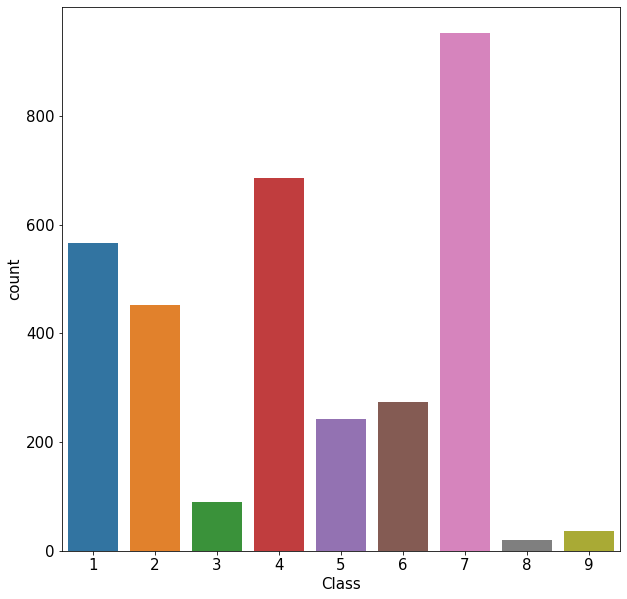

In [9]:
plt.figure(figsize=(10, 10))
font = {'weight': 'normal','size': 15}
plt.rc('font', **font)
plt.xlabel('Class')
sns.countplot(dataSet['Class'].values)
plt.show()

**Text Pre-processing**

In [10]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

st = SnowballStemmer("english")

corpus = []

for text in dataSet['Text']:
    text = re.sub('[^a-zA-Z0-9]', ' ', text.lower())
    text = text.split()  # Spliting text into words
    text = ' '.join(text)  #Joining text
    corpus.append(text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
X = corpus
y = dataSet['Class'].values

**Splitting the dataset into the Training set and Test set**

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

**Features Extraction**

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
max_features=150000
vectorizer = TfidfVectorizer(max_features=max_features, 
                             ngram_range=(2, 2), 
                             stop_words=set(stopwords.words('english')))
X_train = vectorizer.fit_transform(X_train).toarray()
X_test = vectorizer.transform(X_test).toarray()

In [14]:
X_train.shape

(2652, 150000)

In [15]:
def report(y_test, y_pred):
  from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
  import seaborn as sns

  cm = confusion_matrix(y_test, y_pred)
  #cm = pd.DataFrame(cm, le.classes_, le.classes_)
  print('Accuracy:', accuracy_score(y_test, y_pred), sep='\t')
  print('\n')

  plt.figure(figsize=(10, 8))
  sns.heatmap(cm, annot=True, cmap='YlGnBu', fmt = 'd', annot_kws={"size": 25}).set_title('Confusion Matrix')
  plt.show()

In [16]:
acc = {}

##Training The Model Using BernoulliNB

Accuracy:	0.5813253012048193




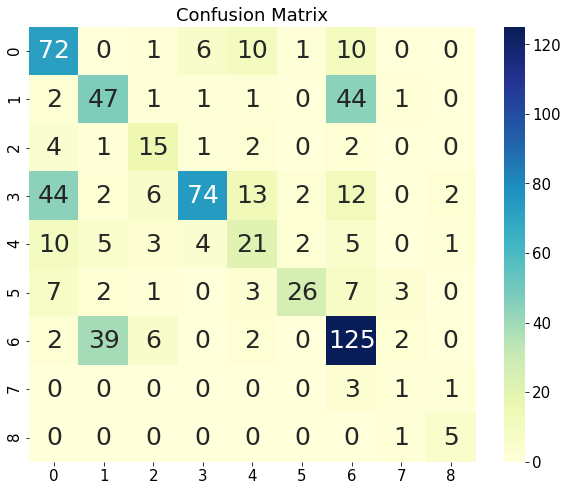

In [17]:
from sklearn.naive_bayes import BernoulliNB

model = BernoulliNB(alpha=1e-10)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

report(y_test, y_pred)
acc['BernoulliNB'] = accuracy_score(y_test, y_pred)

##Training The Model Using ComplementNB

Accuracy:	0.6099397590361446




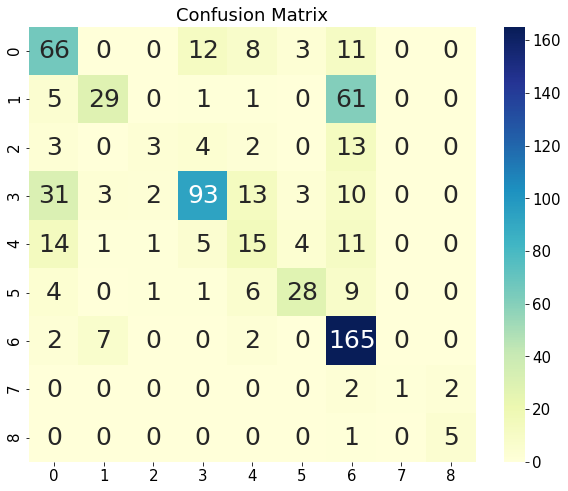

In [18]:
from sklearn.naive_bayes import ComplementNB

model = ComplementNB(alpha=0.1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

report(y_test, y_pred)
acc['ComplementNB'] = accuracy_score(y_test, y_pred)

##Training The Model Using MultinomialNB

Accuracy:	0.6054216867469879




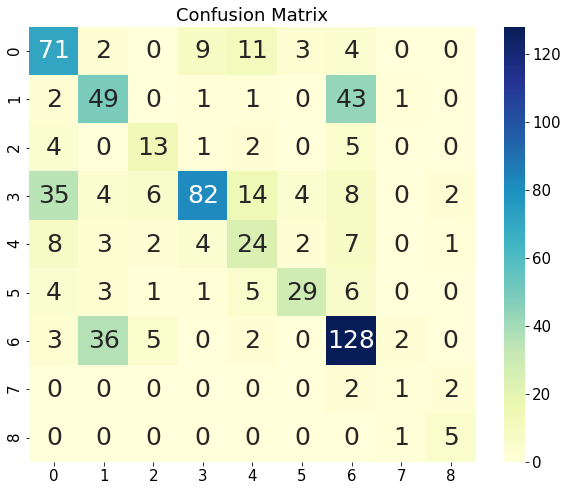

In [19]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB(alpha=0.01)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

report(y_test, y_pred)
acc['MultinomialNB'] = accuracy_score(y_test, y_pred)

##Training The Model Using LinearSVC

Accuracy:	0.6490963855421686




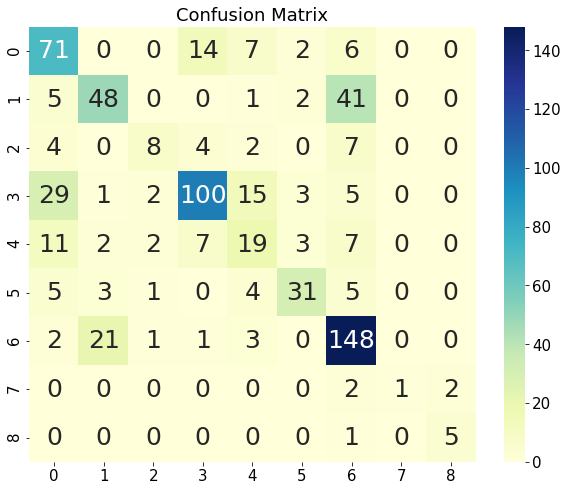

In [20]:
from sklearn.svm import LinearSVC

model = LinearSVC(random_state = 0)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

report(y_test, y_pred)
acc['LinearSVC'] = accuracy_score(y_test, y_pred)

##Training The Model Using RandomForestClassifier

Accuracy:	0.6566265060240963




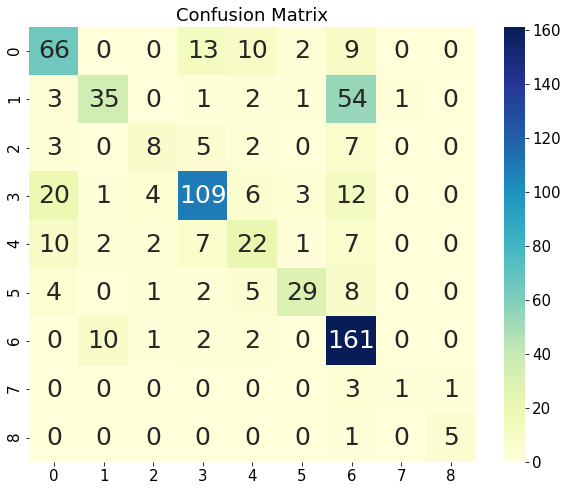

In [22]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 500, criterion = 'entropy', random_state = 0)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

report(y_test, y_pred)
acc['RandomForestClassifier'] = accuracy_score(y_test, y_pred)

In [23]:
pd.DataFrame(data = acc.values(),
             index = acc.keys(),
             columns = ['Accuracy']).sort_values(ascending = False, by = ['Accuracy'])

,Accuracy
RandomForestClassifier,0.656627
LinearSVC,0.649096
ComplementNB,0.609940
MultinomialNB,0.605422
BernoulliNB,0.581325
